In [90]:
# Import necessary libraries
import pandas as pd  # Pandas is used for data manipulation and analysis, especially for creating DataFrames.
import requests      # Requests library is used to download web pages.
from bs4 import BeautifulSoup # Beautiful Soup is a Python library for parsing HTML and XML documents.
                            # It's commonly used for web scraping to extract data from websites.


In [91]:
book = [
"Travel",
"Mystery",
"Historical Fiction",
"Sequential Art",
"Classics",
"Philosophy",
"Romance",
"Womens Fiction",
"Fiction",
"Childrens",
"Religion",
"Nonfiction",
"Music",
"Default",
"Science Fiction",
"Sports and Games",
"Add a comment",
"Fantasy",
"New Adult",
"Young Adult",
"Science",
"Poetry",
"Paranormal",
"Art",
"Psychology",
"Autobiography",
"Parenting",
"Adult Fiction",
"Humor",
"Horror",
"History",
"Food and Drink",
"Christian Fiction",
"Business",
"Biography",
"Thriller",
"Contemporary",
"Spirituality",
"Academic",
"Self Help",
"Historical",
"Christian",
"Suspense",
"Short Stories",
"Novels",
"Health",
"Politics",
"Cultural",
"Erotica",
"Crime"]

print("Original Books List:")
print(book)

all_books= []

for name in book:
    #convering to lower case
    lowercase_name = name.lower()

    # replacing space with -
    formatted_name = lowercase_name.replace(' ', '-')


    all_books.append(formatted_name)



Original Books List:
['Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics', 'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science Fiction', 'Sports and Games', 'Add a comment', 'Fantasy', 'New Adult', 'Young Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult Fiction', 'Humor', 'Horror', 'History', 'Food and Drink', 'Christian Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self Help', 'Historical', 'Christian', 'Suspense', 'Short Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']


In [92]:
# --- Part 4: Scraping Data Across All Categories and Pages ---


# Initialize empty lists to store the scraped data.
book_name = []
book_price = []
book_ratings = [] # This list will store the numeric book ratings.

# Define a mapping from text ratings (e.g., "One", "Two") to numeric values.
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

# Loop through each formatted category to scrape data.
# The 'p' variable represents the index of the category in the 'all_books_formatted' list.
for p in range(len(all_books)):
    # Construct the URL for each book category.
    # The website uses category IDs starting from 2, so 'p+2' is used to match the correct ID.
    base_url = 'https://books.toscrape.com/catalogue/category/books/'
    category_url = f'{base_url}{all_books[p]}_{p+2}/index.html'

    # Download the content of the category webpage.
    webpage = requests.get(category_url).text
    # Parse the HTML content into a Beautiful Soup object.
    soup = BeautifulSoup(webpage, 'lxml')

    # Extract book names and append them to the 'book_name' list.
    for i in soup.find_all('h3'):
        book_name.append(i.text)

    # Extract book prices and append them to the 'book_price' list.
    prices = soup.find_all('p', class_='price_color')
    for j in prices:
        book_price.append(j.text)

    # Extract star ratings and append them to the 'book_ratings' list.
    # Ratings are typically found within 'p' tags with the 'star-rating' class.
    ratings = soup.find_all('p', class_='star-rating')
    for r in ratings:
        # Get all class names from the 'star-rating' paragraph tag.
        rating_class = r.get('class')
        if rating_class and len(rating_class) > 1:
            # The actual rating (e.g., "One", "Two") is usually the second class name.
            rating_text = rating_class[1]
            # Convert the text rating to a numeric value using the 'rating_map'.
            # If the rating text is not found in the map, assign a default of 0.
            book_ratings.append(rating_map.get(rating_text, 0))
        else:
            # If no valid rating class is found, append 0.
            book_ratings.append(0)


In [93]:
# --- Part 5: Data Cleaning and Formatting ---

# Initialize lists to store formatted book names and prices.
book_name_formatted = []
book_price_numeric = [] # This list will store prices as numeric values (floats).

# Clean and format book names.
for name_raw in book_name:
    # Remove the ellipsis " ..." from the end of book titles for cleaner data.
    formatted_name = name_raw.replace(' ...', '')
    book_name_formatted.append(formatted_name)

# Clean and convert book prices to numeric format.
for price_raw in book_price:
    # Replace the Unicode British Pound symbol 'Â£' with a standard '£ ' and then remove it for conversion.
    formatted_str = price_raw.replace('Â£', '£ ').replace('£ ', '')
    try:
        # Convert the cleaned price string to a floating-point number.
        numeric_price = float(formatted_str)
        book_price_numeric.append(numeric_price)
    except ValueError:
        # If conversion fails (e.g., due to unexpected characters), append None.
        book_price_numeric.append(None)

# --- Part 6: Creating a Pandas DataFrame ---

# [Code Box 11]
# Create a dictionary to hold the cleaned data.
# The keys will be column names in the DataFrame, and values will be the lists of data.
book_dictionary = {
    "Book_Name": book_name_formatted,
    "Book_Price": book_price_numeric, # Use the numeric prices.
    "Book_Rating": book_ratings # Include the numeric ratings.
}

# Create a Pandas DataFrame from the dictionary.
df = pd.DataFrame(book_dictionary)

# Set a custom index for the DataFrame, starting from 1 (Book No.).
custom_index_numbers = list(range(1, len(df) + 1))
df.index = pd.Index(custom_index_numbers, name='Book No.')

# Print the first few rows of the DataFrame to inspect the data with new features.
print("DataFrame with Book Name, Price, and Rating (first 5 rows):")
print(df.head())
# Print the total number of books scraped.
print(f"\nTotal books scraped: {len(df)} (This should ideally be around 1000 if all pages were scraped correctly.)")


DataFrame with Book Name, Price, and Rating (first 5 rows):
                               Book_Name  Book_Price  Book_Rating
Book No.                                                         
1                It's Only the Himalayas       45.17            2
2                Full Moon over Noahâs       49.43            4
3             See America: A Celebration       48.87            3
4         Vagabonding: An Uncommon Guide       36.94            2
5                   Under the Tuscan Sun       37.33            3

Total books scraped: 517 (This should ideally be around 1000 if all pages were scraped correctly.)


In [94]:
df

,Book_Name,Book_Price,Book_Rating
Book No.,,,
1,It's Only the Himalayas,45.17,2
2,Full Moon over Noahâs,49.43,4
3,See America: A Celebration,48.87,3
4,Vagabonding: An Uncommon Guide,36.94,2
5,Under the Tuscan Sun,37.33,3
...,...,...,...
513,Why the Right Went,52.65,4
514,Equal Is Unfair: America's,56.86,1
515,Amid the Chaos,36.58,1


In [95]:
# --- Part 7: Feature Engineering ---

# Feature Engineering: Creating 'Price_Range' and 'Rating_Category' columns.

# 1. Price_Range: Categorize books into "Cheap", "Medium", "Expensive".
# Price bins are determined based on the distribution of prices.
# 'right=False' means the bin includes the lower bound but excludes the upper bound (e.g., [0, 25)).
price_bins = [0, 25, 45, df['Book_Price'].max() + 1] # Add 1 to max price to ensure all values are covered.
price_labels = ["Cheap", "Medium", "Expensive"]
df['Price_Range'] = pd.cut(df['Book_Price'], bins=price_bins, labels=price_labels, right=False)

# 2. Rating_Category: Classify ratings into "Low", "Average", "High".
# Ratings are from 1 to 5.
# For example: 1-2 = Low, 3 = Average, 4-5 = High.
rating_bins = [0, 2.5, 3.5, 5.5] # Bins designed to capture 1,2 (Low), 3 (Average), 4,5 (High).
rating_labels = ["Low", "Average", "High"]
df['Rating_Category'] = pd.cut(df['Book_Rating'], bins=rating_bins, labels=rating_labels, right=False)

print("\nDataFrame with new features 'Price_Range' and 'Rating_Category' (first 5 rows):")
print(df.head()) # Display the first few rows with the new features.



DataFrame with new features 'Price_Range' and 'Rating_Category' (first 5 rows):
                               Book_Name  Book_Price  Book_Rating Price_Range  \
Book No.                                                                        
1                It's Only the Himalayas       45.17            2   Expensive   
2                Full Moon over Noahâs       49.43            4   Expensive   
3             See America: A Celebration       48.87            3   Expensive   
4         Vagabonding: An Uncommon Guide       36.94            2      Medium   
5                   Under the Tuscan Sun       37.33            3      Medium   

         Rating_Category  
Book No.                  
1                    Low  
2                   High  
3                Average  
4                    Low  
5                Average  


In [103]:
df

,Book_Name,Book_Price,Book_Rating,Price_Range,Rating_Category
Book No.,,,,,
1,It's Only the Himalayas,45.17,2,Expensive,Low
2,Full Moon over Noahâs,49.43,4,Expensive,High
3,See America: A Celebration,48.87,3,Expensive,Average
4,Vagabonding: An Uncommon Guide,36.94,2,Medium,Low
5,Under the Tuscan Sun,37.33,3,Medium,Average
...,...,...,...,...,...
513,Why the Right Went,52.65,4,Expensive,High
514,Equal Is Unfair: America's,56.86,1,Expensive,Low
515,Amid the Chaos,36.58,1,Medium,Low


In [96]:

# --- Part 8: Exploratory Data Analysis (EDA) ---


print("\n--- Exploratory Data Analysis (EDA) ---")

# Check data types and non-null values for each column.
print("\nDataFrame Information (Data Types and Missing Values):")
df.info()

# Display basic descriptive statistics for numerical columns (mean, median, min, max, etc.).
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())

# Count the number of books in each 'Price_Range' category.
print("\nNumber of Books in Each Price Range:")
print(df['Price_Range'].value_counts())

# Count the number of books in each 'Rating_Category'.
print("\nNumber of Books in Each Rating Category:")
print(df['Rating_Category'].value_counts())



--- Exploratory Data Analysis (EDA) ---

DataFrame Information (Data Types and Missing Values):
<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 1 to 517
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Book_Name        517 non-null    object  
 1   Book_Price       517 non-null    float64 
 2   Book_Rating      517 non-null    int64   
 3   Price_Range      517 non-null    category
 4   Rating_Category  517 non-null    category
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 17.4+ KB

Basic Statistics for Numerical Columns:
       Book_Price  Book_Rating
count  517.000000   517.000000
mean    35.315068     2.897485
std     14.341524     1.454455
min     10.010000     1.000000
25%     22.540000     2.000000
50%     36.260000     3.000000
75%     48.190000     4.000000
max     59.990000     5.000000

Number of Books in Each Price Range:
Price_Range
Medium       213
Expensive   

In [97]:
import matplotlib.pyplot as plt # Import Matplotlib for plotting.
import seaborn as sns         # Import Seaborn for enhanced visualizations.


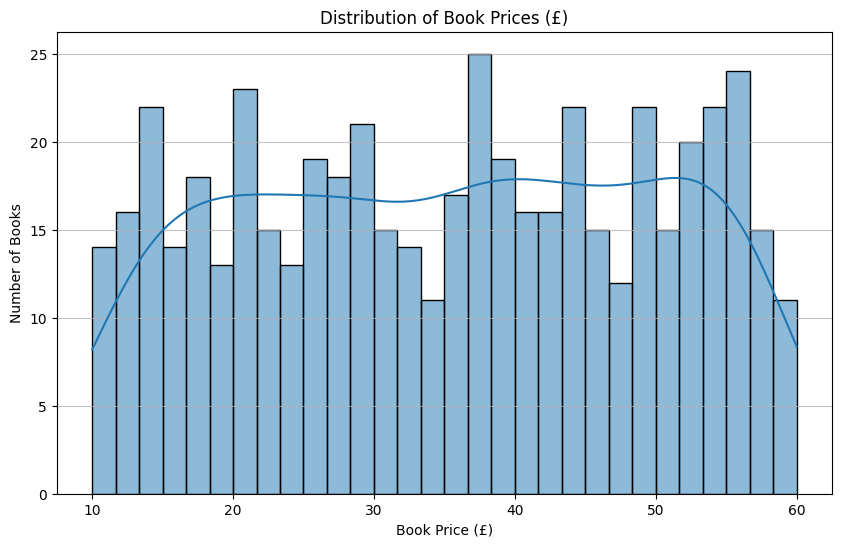

In [104]:

# --- Visualizations ---

# Histogram of Book Prices:
# This plot shows the distribution of book prices.
plt.figure(figsize=(10, 6)) # Set the figure size for better readability.
sns.histplot(df['Book_Price'], bins=30, kde=True) # Create a histogram with 30 bins; kde=True adds a density curve.
plt.title('Distribution of Book Prices (£)') # Set the title of the plot.
plt.xlabel('Book Price (£)') # Label for the X-axis.
plt.ylabel('Number of Books') # Label for the Y-axis.
plt.grid(axis='y', alpha=0.75) # Add horizontal grid lines for better readability.
plt.show() # Display the plot.



/tmp/ipython-input-99-717387296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book_Rating', data=df, palette='viridis') # Create a bar plot of 'Book_Rating' counts.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

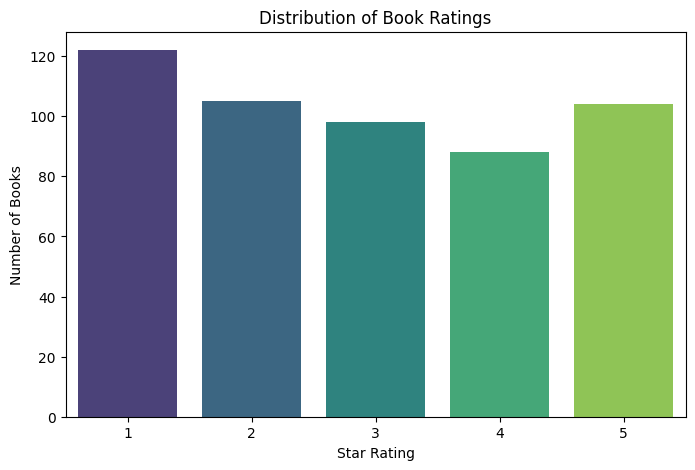

In [99]:
# Bar Plot of Book Ratings:
# This plot shows the count of books for each star rating.
plt.figure(figsize=(8, 5)) # Set the figure size.
sns.countplot(x='Book_Rating', data=df, palette='viridis') # Create a bar plot of 'Book_Rating' counts.
plt.title('Distribution of Book Ratings') # Set the title.
plt.xlabel('Star Rating') # X-axis label.
plt.ylabel('Number of Books') # Y-axis label.
plt

/tmp/ipython-input-100-1377277880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating_Category', data=df, order=rating_labels, palette='cividis') # Order ensures logical display (Low, Average, High).


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

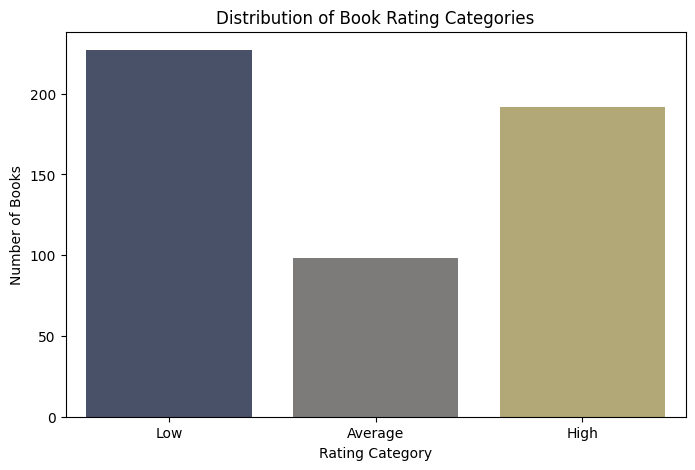

In [100]:
# Bar Plot of Rating Categories:
# This plot shows the count of books in each 'Rating_Category'.
plt.figure(figsize=(8, 5)) # Set the figure size.
sns.countplot(x='Rating_Category', data=df, order=rating_labels, palette='cividis') # Order ensures logical display (Low, Average, High).
plt.title('Distribution of Book Rating Categories') # Set the title.
plt.xlabel('Rating Category') # X-axis label.
plt.ylabel('Number of Books') # Y-axis label.
plt

/tmp/ipython-input-101-505340845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Range', y='Book_Rating', data=df, order=price_labels, palette='plasma') # Plot average rating for each price range.


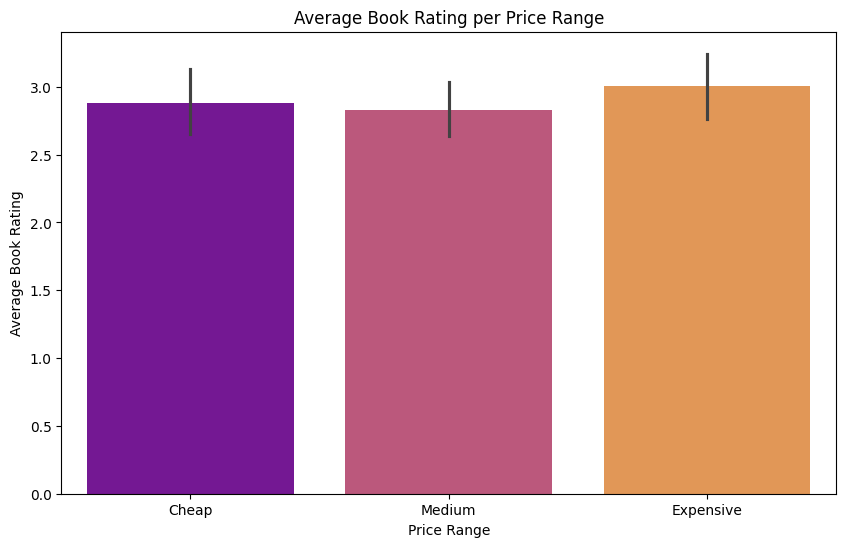

In [101]:
# Bar Plot: Average Book Rating by Price Range:
# This plot explores the relationship between book price ranges and their average ratings.
plt.figure(figsize=(10, 6)) # Set the figure size.
sns.barplot(x='Price_Range', y='Book_Rating', data=df, order=price_labels, palette='plasma') # Plot average rating for each price range.
plt.title('Average Book Rating per Price Range') # Set the title.
plt.xlabel('Price Range') # X-axis label.
plt.ylabel('Average Book Rating') # Y-axis label.
plt.show() # Display the plot.


In [102]:
# --- Part 10: Saving the DataFrame to a CSV File ---


# Save the DataFrame to a CSV file.
# 'index=False' prevents Pandas from writing the DataFrame index as a column in the CSV.
# This CSV file can be easily uploaded to Kaggle and GitHub.
df.to_csv('scraped_books_data.csv', index=False)
print("\nDataFrame successfully saved to 'scraped_books_data.csv'")


DataFrame successfully saved to 'scraped_books_data.csv'
